Reaction diffusion system simulation: Version using partial differences spatial discretization (1st order) and ode-solver

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [233]:
# discretization
size = 1.
x = np.linspace(0,size,101)
dx = x[1] - x[0]
T = 10.
t = np.linspace(0, T, 101)

In [234]:
# second differential using finite differnces
def diffTwo(Z):
    # first order, maybe try higher order
    Zcenter = Z[1:-1]
    Zleft = Z[:-2]
    Zright = Z[2:]
    return (Zleft - 2*Zcenter + Zright) / dx**2

In [235]:
# function that returns the derivative
def diffusion(u, t, Du):
    dudt = np.zeros_like(u)
    dudt[1:-1] = Du * diffTwo(u)
    # Neumann conditions:
    dudt[0] = 0
    dudt[-1] = 0
    return dudt

In [306]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
u0 = gaussian(x, 0.1, 0.05)
#u0 = np.zeros_like(x)
#u0[1:20] = 1.
#u0[0] = 0.5
Du = 0.001

In [307]:
ut = odeint(diffusion, u0, t, (Du,))

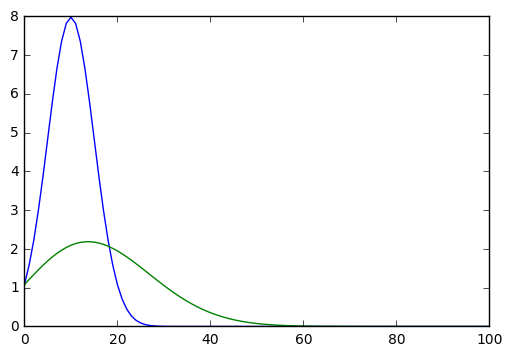

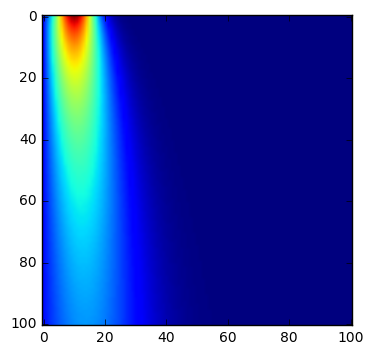

In [308]:
plt.figure(1)
plt.plot(ut[0,:])
plt.plot(ut[-1,:]);

plt.figure(2)
plt.imshow(ut);

Differential equation: 2 component reaction diffusion
$$ \frac{\partial a}{\partial t} = D_a \frac{\partial^2 a}{\partial x^2} - \delta_a a$$
$$ \frac{\partial g}{\partial t} = \frac{\alpha_g \cdot a^n}{K_a^n + a^n} - \delta_g g $$
a is the concentration of AHL, g is GFP
$$\\ \boldsymbol{y}(x,t) = \left(\begin{array}{c}a(x,t)\\g(x,t)\end{array}\right) $$
$$ \frac{\partial \boldsymbol{y}}{\partial t} = \boldsymbol{f}(x,t) $$

In [214]:
def rd(y, t, Da, delta_a, n, Ka, alpha_g, delta_g):
    varLength = int(len(y)/2)
    a = y[0:varLength]
    g = y[varLength:]
    ac = a[1:-1]
    gc = g[1:-1]
    dydt = np.zeros_like(y)
    dydt[1:varLength-1] = Da*diffTwo(a) - delta_a*ac
    dydt[varLength+1:-1] = (alpha_g*np.power(ac,n))/(np.power(Ka,n)+np.power(ac,n)) - delta_g*gc
    #da/dt, dg/dt zero at boundary (Neumann condition)
    return dydt

In [312]:
#a0 = np.zeros_like(x)
#a0[0:20] = 1.
a0 = 10*gaussian(x, 0.2, 0.05)
g0 = np.zeros_like(a0)
y0 = np.append(a0,g0)
Da = 0.005
delta_a = 0.5
n = 5.
Ka = 1.
alpha_g = 10.0
delta_g = 0.01

In [313]:
y = odeint(rd, y0, t, (Da,delta_a,n,Ka,alpha_g,delta_g))
varLength = int(len(y[0,:])/2)
a = y[:,0:varLength-1]
g = y[:,varLength:-1]

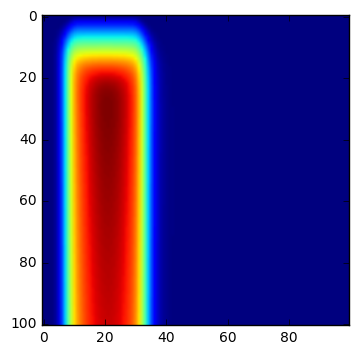

In [314]:
g2 = g
plt.imshow(g1)

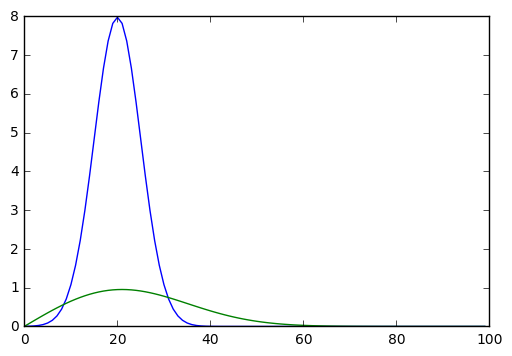

In [305]:
plt.plot(a[0,:])
plt.plot(a[20,:])

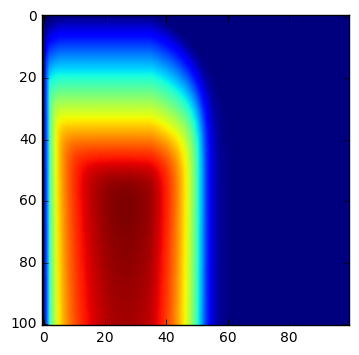

In [315]:
plt.imshow(g2)

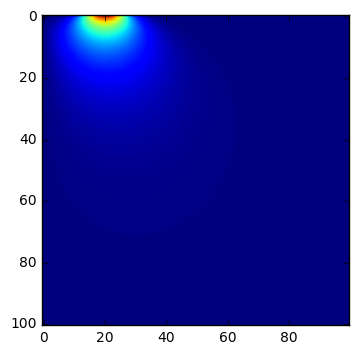

In [302]:
plt.imshow(a)

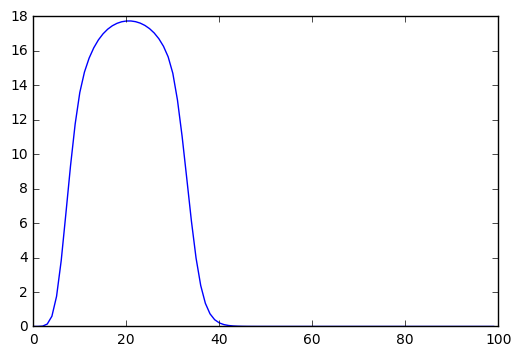

In [301]:
plt.plot(g[20,:])

In [213]:
Length = 5
a = np.zeros(2*Length, dtype=np.int)
a[1:Length-1]=1
a[Length+1:-1]=1
print(a)
len(a[1:Length-1])

[0 1 1 1 0 0 1 1 1 0]


3

In [193]:
a[Length:]

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201])